In [1]:
import numpy as np
import pandas as pd
from analytics.parallel import parallel_analysis_multiprocessing
from analytics.parallel import parallel_analysis_threading
from analytics.statistics import calculate_moving_average_city
from analytics.statistics import detect_anomalies
from analytics.statistics import plot_long_term_trends
from analytics.statistics import seasonal_statistics
from sklearn.linear_model import LinearRegression
from data import DATA_PATH
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
data = pd.read_csv(f'{DATA_PATH}/temperature_data.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54750 entries, 0 to 54749
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   city         54750 non-null  object        
 1   timestamp    54750 non-null  datetime64[ns]
 2   temperature  54750 non-null  float64       
 3   season       54750 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.7+ MB


Beijing


,mean_temperature,std_temperature,lower_bound,upper_bound
season,,,,
autumn,15.968231,4.882319,6.203592,25.732869
spring,12.845472,4.876197,3.093077,22.597867
summer,27.123428,5.061753,16.999922,37.246934
winter,-1.888846,4.740462,-11.369771,7.592079


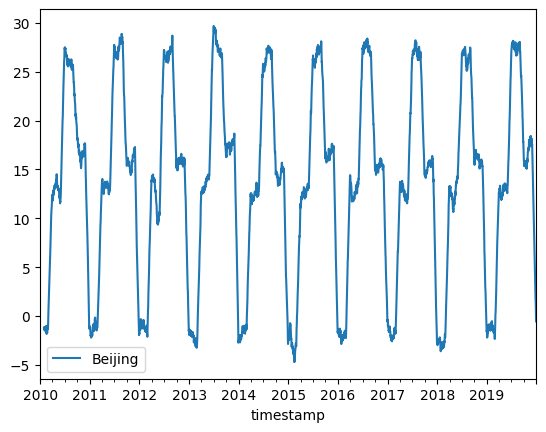

------------------------------------------------------------------------------------------------------------------------
Berlin


,mean_temperature,std_temperature,lower_bound,upper_bound
season,,,,
autumn,10.922238,5.016363,0.889513,20.954964
spring,10.083096,5.267313,-0.451530,20.617722
summer,19.960578,4.817268,10.326042,29.595115
winter,0.026795,5.020799,-10.014804,10.068394


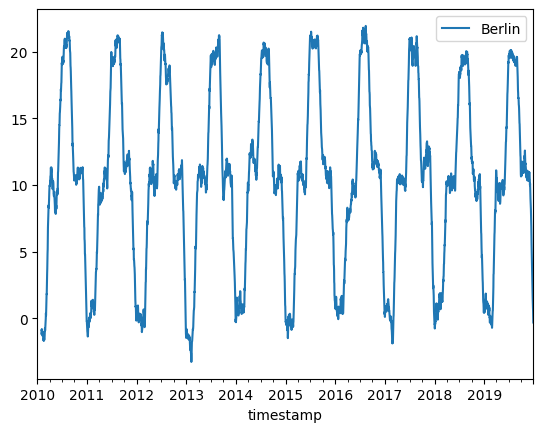

------------------------------------------------------------------------------------------------------------------------
Cairo


,mean_temperature,std_temperature,lower_bound,upper_bound
season,,,,
autumn,25.026858,5.058335,14.910188,35.143528
spring,25.271260,5.119879,15.031502,35.511018
summer,34.837236,5.151817,24.533602,45.140871
winter,14.777199,4.919846,4.937507,24.616890


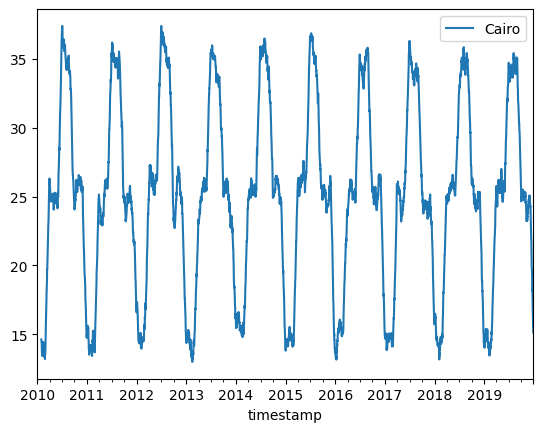

------------------------------------------------------------------------------------------------------------------------
Dubai


,mean_temperature,std_temperature,lower_bound,upper_bound
season,,,,
autumn,29.751063,5.034849,19.681366,39.820761
spring,29.817904,4.953218,19.911467,39.724340
summer,40.142404,5.183761,29.774883,50.509926
winter,19.949742,4.989695,9.970353,29.929131


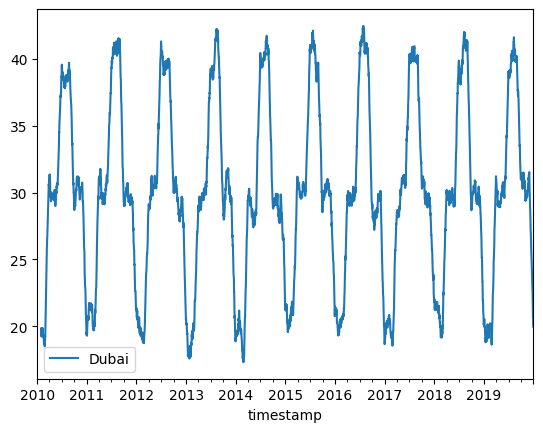

------------------------------------------------------------------------------------------------------------------------
London


,mean_temperature,std_temperature,lower_bound,upper_bound
season,,,,
autumn,11.968524,4.763317,2.441889,21.495158
spring,11.005763,5.127698,0.750367,21.261158
summer,17.784640,5.060922,7.662796,27.906485
winter,4.826421,4.991379,-5.156337,14.809179


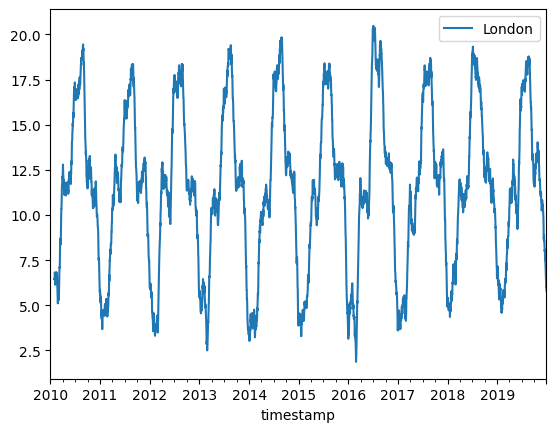

------------------------------------------------------------------------------------------------------------------------
Los Angeles


,mean_temperature,std_temperature,lower_bound,upper_bound
season,,,,
autumn,20.087265,5.118816,9.849632,30.324897
spring,18.070447,5.095920,7.878607,28.262288
summer,24.927511,4.889105,15.149300,34.705721
winter,14.911471,5.109431,4.692609,25.130333


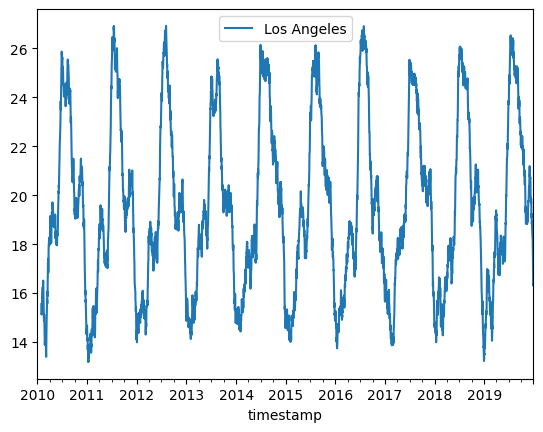

------------------------------------------------------------------------------------------------------------------------
Mexico City


,mean_temperature,std_temperature,lower_bound,upper_bound
season,,,,
autumn,15.319893,4.990877,5.338139,25.301646
spring,18.096357,4.759681,8.576994,27.615719
summer,20.065263,4.945099,10.175066,29.955460
winter,12.336323,4.875135,2.586053,22.086593


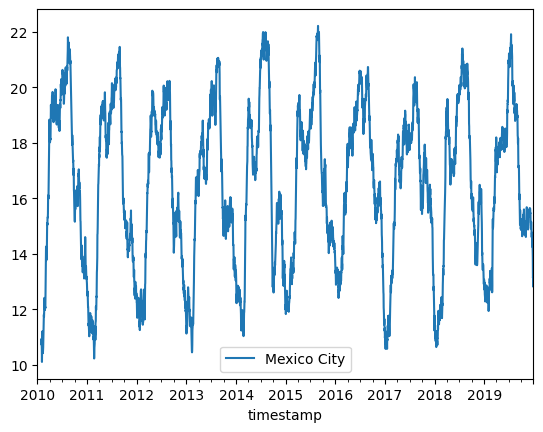

------------------------------------------------------------------------------------------------------------------------
Moscow


,mean_temperature,std_temperature,lower_bound,upper_bound
season,,,,
autumn,7.721749,4.814940,-1.908131,17.351630
spring,5.071991,5.003551,-4.935110,15.079092
summer,17.864803,5.065122,7.734559,27.995047
winter,-10.002732,4.921042,-19.844815,-0.160648


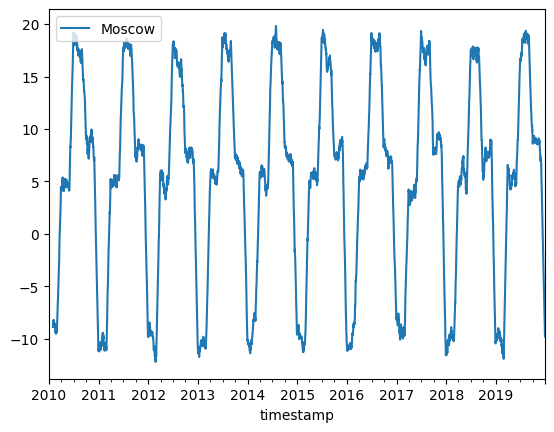

------------------------------------------------------------------------------------------------------------------------
Mumbai


,mean_temperature,std_temperature,lower_bound,upper_bound
season,,,,
autumn,29.993477,4.952848,20.087782,39.899173
spring,29.778151,5.033658,19.710834,39.845468
summer,35.197288,4.938365,25.320558,45.074017
winter,24.978649,5.291621,14.395407,35.561891


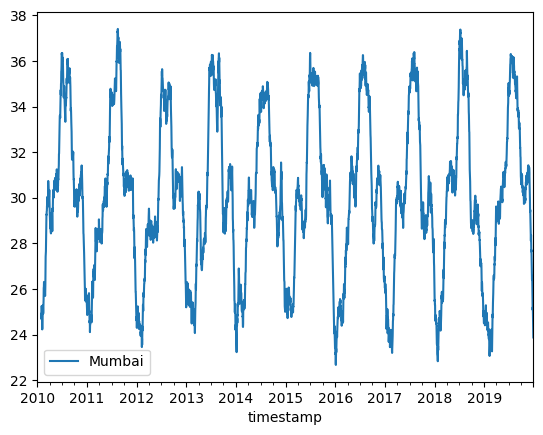

------------------------------------------------------------------------------------------------------------------------
New York


,mean_temperature,std_temperature,lower_bound,upper_bound
season,,,,
autumn,15.057440,5.059673,4.938095,25.176785
spring,10.297995,4.926805,0.444386,20.151605
summer,24.792425,4.891462,15.009501,34.575349
winter,-0.032649,4.911222,-9.855092,9.789794


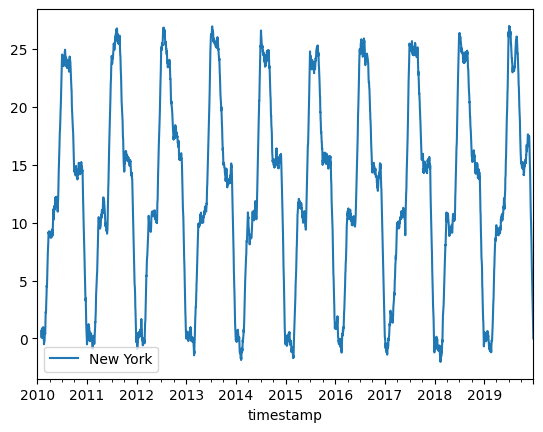

------------------------------------------------------------------------------------------------------------------------
Paris


,mean_temperature,std_temperature,lower_bound,upper_bound
season,,,,
autumn,12.990648,5.116918,2.756812,23.224485
spring,11.773908,4.915579,1.942749,21.605066
summer,19.989059,5.180537,9.627984,30.350133
winter,4.250190,5.032169,-5.814148,14.314527


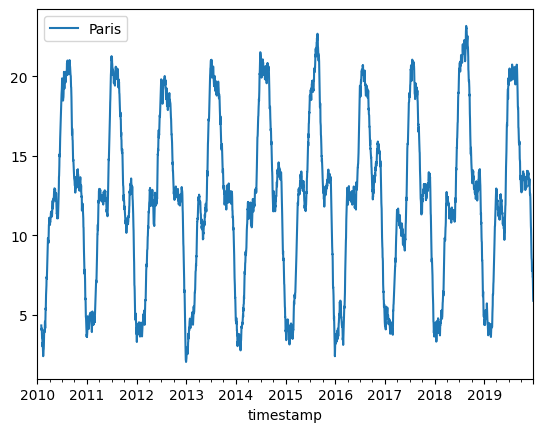

------------------------------------------------------------------------------------------------------------------------
Rio de Janeiro


,mean_temperature,std_temperature,lower_bound,upper_bound
season,,,,
autumn,24.975919,4.950174,15.075570,34.876268
spring,24.945338,4.985866,14.973607,34.917069
summer,29.587840,4.898779,19.790282,39.385399
winter,19.786247,5.111732,9.562784,30.009711


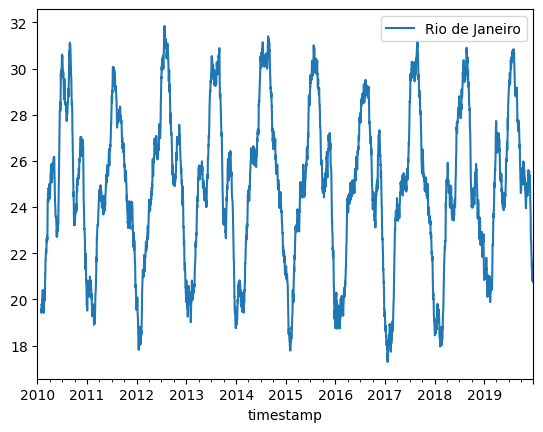

------------------------------------------------------------------------------------------------------------------------
Singapore


,mean_temperature,std_temperature,lower_bound,upper_bound
season,,,,
autumn,27.089271,4.845625,17.398020,36.780521
spring,27.825082,5.068069,17.688944,37.961221
summer,27.590497,5.024226,17.542044,37.638950
winter,27.120982,5.058960,17.003063,37.238902


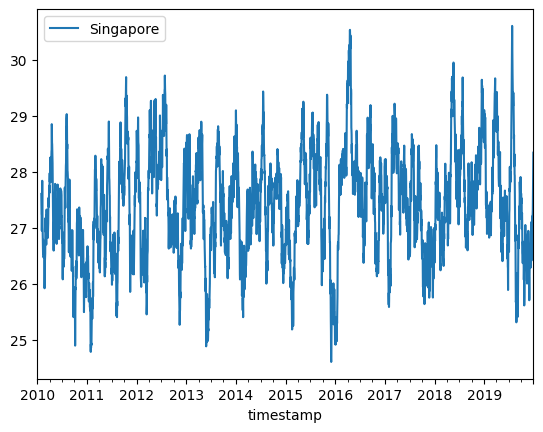

------------------------------------------------------------------------------------------------------------------------
Sydney


,mean_temperature,std_temperature,lower_bound,upper_bound
season,,,,
autumn,19.991710,5.135618,9.720474,30.262945
spring,18.200614,5.121439,7.957736,28.443492
summer,25.075463,4.817392,15.440680,34.710246
winter,11.942694,5.059426,1.823841,22.061546


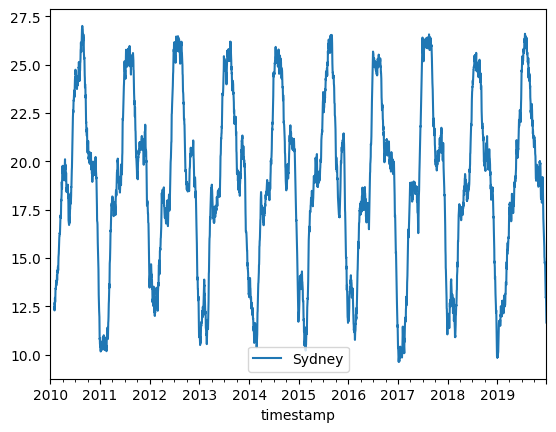

------------------------------------------------------------------------------------------------------------------------
Tokyo


,mean_temperature,std_temperature,lower_bound,upper_bound
season,,,,
autumn,17.952888,5.058760,7.835368,28.070407
spring,14.831096,4.962589,4.905919,24.756274
summer,27.017520,5.041051,16.935418,37.099622
winter,5.796193,5.073950,-4.351708,15.944093


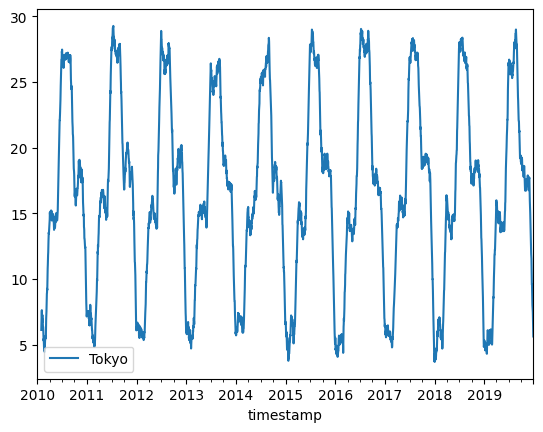

------------------------------------------------------------------------------------------------------------------------


In [4]:
for city, city_data in data.groupby('city'):
    print(city)
    city_data = city_data.set_index('timestamp').sort_index()
    display(seasonal_statistics(city_data))
    city_data['rolling_mean'] = calculate_moving_average_city(city_data)
    plt.figure()
    city_data['rolling_mean'].plot(label=city)
    plt.legend()
    plt.show()
    print('-'*120)

In [5]:
%time moving_average_city = pd.concat([calculate_moving_average_city(group) for _, group in data.groupby('city')])
%time multiproccessing_moving_average_city = parallel_analysis_multiprocessing(data, calculate_moving_average_city)
%time threading_moving_average_city = parallel_analysis_threading(data, calculate_moving_average_city)

CPU times: user 23.5 ms, sys: 1.44 ms, total: 24.9 ms
Wall time: 9.26 ms
CPU times: user 25.3 ms, sys: 21.2 ms, total: 46.5 ms
Wall time: 1.25 s
CPU times: user 9.79 ms, sys: 2.87 ms, total: 12.7 ms
Wall time: 11.1 ms


Заметим, что трединг позволяет ускорить работу подсчет скользящей средней.

In [6]:
%time pd.concat([seasonal_statistics(group) for _, group in data.groupby('city')])
%time parallel_analysis_multiprocessing(data, seasonal_statistics)
%time parallel_analysis_threading(data, seasonal_statistics)
print()

CPU times: user 24.4 ms, sys: 2.02 ms, total: 26.4 ms
Wall time: 25.2 ms
CPU times: user 10.3 ms, sys: 16.4 ms, total: 26.7 ms
Wall time: 1.43 s
CPU times: user 26.6 ms, sys: 4.46 ms, total: 31.1 ms
Wall time: 27.1 ms



Тот же результат - трединг позволяет ускорить работу подсчет.

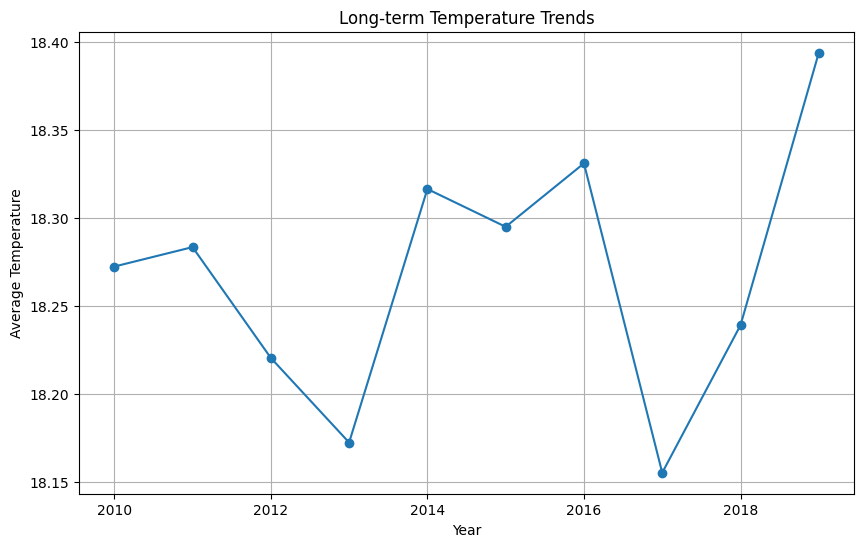

In [7]:
def plot_long_term_trends(data):
    trends = data.groupby('year')['temperature'].mean()
    plt.figure(figsize=(10, 6))
    plt.plot(trends.index, trends.values, marker='o')
    plt.title("Long-term Temperature Trends")
    plt.xlabel("Year")
    plt.ylabel("Average Temperature")
    plt.grid()
    plt.show()

data['year'] = data['timestamp'].dt.year
plot_long_term_trends(data)

In [8]:
def detect_trend(data):    
    X = data['temperature'].shift(-1).fillna(0).values.reshape(-1, 1)
    y = data['temperature'].values

    model = LinearRegression()
    model.fit(X, y)
    slope = model.coef_[0]

    if slope > 0:
        trend = 'Положительный тренд'
    elif slope < 0:
        trend = 'Отрицательный тренд'
    else:
        trend = 'Нет тренда'

    return model, trend

In [9]:
data = data[data['city'] == 'Moscow']

Положительный тренд


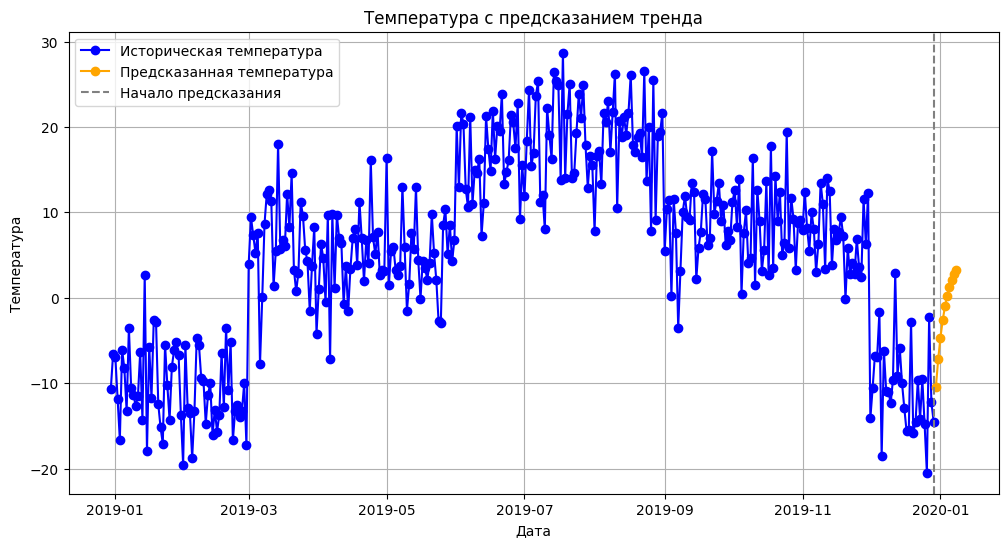

In [10]:
data = data.sort_values('timestamp')
model, trend_result = detect_trend(data)
data = data[int(len(data)*0.9):]
print(trend_result)

last_temperature = data['temperature'].iloc[-1]
future_temperatures = []

for _ in range(10):
    next_temp = model.predict(np.array([[last_temperature]]))[0]
    future_temperatures.append(next_temp)
    last_temperature = next_temp

future_dates = pd.date_range(start=data['timestamp'].iloc[-1] + pd.Timedelta(days=1), periods=10)
future_data = pd.DataFrame({
    'timestamp': future_dates,
    'temperature': future_temperatures
})

combined_data = pd.concat([data, future_data], ignore_index=True)

plt.figure(figsize=(12, 6))

plt.plot(data['timestamp'], data['temperature'], label='Историческая температура', color='blue', marker='o')

plt.plot(future_data['timestamp'], future_data['temperature'], label='Предсказанная температура', color='orange', marker='o')

plt.title('Температура с предсказанием тренда')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.axvline(x=data['timestamp'].iloc[-1], color='gray', linestyle='--', label='Начало предсказания')

plt.legend()
plt.grid()
plt.show()